In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix , classification_report


import warnings
warnings.filterwarnings(action="ignore")

In [2]:
train_df=pd.read_csv('train.csv')
oil_df=pd.read_csv('oil.csv')
holiday_df=pd.read_csv('holidays_events.csv')
store_df=pd.read_csv('stores.csv')
transaction_df=pd.read_csv('transactions.csv')

In [ ]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
store_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
holiday_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [7]:
transaction_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [8]:
holiday_df['date'] = pd.to_datetime(holiday_df['date'])
train_df['date'] = pd.to_datetime(train_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])
transaction_df['date'] = pd.to_datetime(transaction_df['date'])

In [9]:
train_df.date = pd.to_datetime(train_df.date)
train_df['year'] = train_df.date.dt.year
train_df['month']=train_df.date.dt.month
train_df['day'] = train_df.date.dt.day
train_df['dayofweek'] = train_df.date.dt.dayofweek
train_df['dayname'] = train_df.date.dt.strftime('%A')



In [10]:
dataframes = {
    'df_train': train_df,
    'df_transactions': transaction_df,
    'df_stores': store_df,
    'df_oil': oil_df,
    'df_holidays': holiday_df
}

In [11]:
def check_missing_values(dataframes):
    for name, df in dataframes.items():
        print(f"\nChecking missing values in {name}:")
        missing_values = df.isnull().sum()
        missing_data = pd.DataFrame({'Missing Values': missing_values})
        print(missing_data[missing_data['Missing Values'] > 0])

In [12]:
check_missing_values(dataframes)


Checking missing values in df_train:
Empty DataFrame
Columns: [Missing Values]
Index: []

Checking missing values in df_transactions:
Empty DataFrame
Columns: [Missing Values]
Index: []

Checking missing values in df_stores:
Empty DataFrame
Columns: [Missing Values]
Index: []

Checking missing values in df_oil:
            Missing Values
dcoilwtico              43

Checking missing values in df_holidays:
Empty DataFrame
Columns: [Missing Values]
Index: []


In [13]:
def check_duplicates(dataframes):
    for name, df in dataframes.items():
        duplicates = df[df.duplicated()]
        print(f"\nChecking duplicates in {name.capitalize()} dataset:")
        if duplicates.empty:
            print("No duplicates found.")
        else:
            print(f"Number of duplicate rows: {duplicates.shape[0]}")
            print(duplicates)
        print("*" * 40)

In [14]:
check_duplicates(dataframes)



Checking duplicates in Df_train dataset:
No duplicates found.
****************************************

Checking duplicates in Df_transactions dataset:
No duplicates found.
****************************************

Checking duplicates in Df_stores dataset:
No duplicates found.
****************************************

Checking duplicates in Df_oil dataset:
No duplicates found.
****************************************

Checking duplicates in Df_holidays dataset:
No duplicates found.
****************************************


In [15]:
def print_shapes(dfs):
    for name, df in dfs.items():
        print(f"Shape of {name} DataFrame: {df.shape}")

In [16]:
print_shapes(dataframes)

Shape of df_train DataFrame: (3000888, 11)
Shape of df_transactions DataFrame: (83488, 3)
Shape of df_stores DataFrame: (54, 5)
Shape of df_oil DataFrame: (1218, 2)
Shape of df_holidays DataFrame: (350, 6)


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int64         
 7   month        int64         
 8   day          int64         
 9   dayofweek    int64         
 10  dayname      object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 251.8+ MB


In [18]:
train_df.describe()

,id,store_nbr,sales,onpromotion,year,month,day,dayofweek
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00,2.014838e+03,6.207838e+00,1.563005e+01,2.997031e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01,1.345518e+00,3.385668e+00,8.794789e+00,2.000740e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00,2.014000e+03,3.000000e+00,8.000000e+00,1.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00,2.015000e+03,6.000000e+00,1.600000e+01,3.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00,2.016000e+03,9.000000e+00,2.300000e+01,5.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,2.017000e+03,1.200000e+01,3.100000e+01,6.000000e+00


In [19]:
train_df = pd.merge(train_df,store_df,how='left',on='store_nbr')


In [ ]:
train_df = pd.merge(train_df,holiday_df, on='date', how='left')


In [20]:

train_df = pd.merge(train_df,oil_df, on='date', how='left')

train_df

,id,date,store_nbr,family,sales,onpromotion,year,month,day,dayofweek,...,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1,...,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1,...,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1,...,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1,...,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1,...,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1,...,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1,...,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1,...,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1,...,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57


In [21]:
train_df=train_df.dropna()
train_df

,id,date,store_nbr,family,sales,onpromotion,year,month,day,dayofweek,...,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico
73062,73062,2013-02-11,1,AUTOMOTIVE,0.000,0,2013,2,11,0,...,Quito,Pichincha,D,13,Holiday,National,Ecuador,Carnaval,False,97.01
73063,73063,2013-02-11,1,BABY CARE,0.000,0,2013,2,11,0,...,Quito,Pichincha,D,13,Holiday,National,Ecuador,Carnaval,False,97.01
73064,73064,2013-02-11,1,BEAUTY,0.000,0,2013,2,11,0,...,Quito,Pichincha,D,13,Holiday,National,Ecuador,Carnaval,False,97.01
73065,73065,2013-02-11,1,BEVERAGES,172.000,0,2013,2,11,0,...,Quito,Pichincha,D,13,Holiday,National,Ecuador,Carnaval,False,97.01
73066,73066,2013-02-11,1,BOOKS,0.000,0,2013,2,11,0,...,Quito,Pichincha,D,13,Holiday,National,Ecuador,Carnaval,False,97.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1,...,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1,...,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1,...,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1,...,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57


In [22]:
train_df = pd.merge(train_df,transaction_df, on='date', how='left')



In [23]:
train_df

,id,date,store_nbr_x,family,sales,onpromotion,year,month,day,dayofweek,...,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico,store_nbr_y,transactions
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,D,13,Holiday,National,Ecuador,Carnaval,False,97.01,1,396
1,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,D,13,Holiday,National,Ecuador,Carnaval,False,97.01,2,1486
2,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,D,13,Holiday,National,Ecuador,Carnaval,False,97.01,3,2532
3,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,D,13,Holiday,National,Ecuador,Carnaval,False,97.01,4,1263
4,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,D,13,Holiday,National,Ecuador,Carnaval,False,97.01,5,1029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16200157,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,50,2804
16200158,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,51,1573
16200159,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,52,2255
16200160,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,53,932


In [24]:
train_df.isnull().sum()

id              0
date            0
store_nbr_x     0
family          0
sales           0
onpromotion     0
year            0
month           0
day             0
dayofweek       0
dayname         0
city            0
state           0
type_x          0
cluster         0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
store_nbr_y     0
transactions    0
dtype: int64

In [25]:
data_encoder={
    "family_encoder":train_df['family'],
    'dayname_encoder':train_df['dayname'],
    'city_encoder':train_df['city'],
    'state_encoder':train_df['state'],
    'store_type_encoder':train_df['type_x'],
    'holiday_type_encoder':train_df['type_y'],
    'local_encoder':train_df['locale'],
    'locale_name_encoder':train_df['locale_name'],
    'description_encoder':train_df['description'],
    'transferred_encoder':train_df['transferred']

}

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for name,value in data_encoder.items():
  train_df[name] = label_encoder.fit_transform(value)
 
train_df

,id,date,store_nbr_x,family,sales,onpromotion,year,month,day,dayofweek,...,family_encoder,dayname_encoder,city_encoder,state_encoder,store_type_encoder,holiday_type_encoder,local_encoder,locale_name_encoder,description_encoder,transferred_encoder
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,0,1,18,12,3,3,1,4,11,0
1,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,0,1,18,12,3,3,1,4,11,0
2,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,0,1,18,12,3,3,1,4,11,0
3,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,0,1,18,12,3,3,1,4,11,0
4,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,2013,2,11,0,...,0,1,18,12,3,3,1,4,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16200157,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,32,3,18,12,1,3,0,19,26,0
16200158,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,32,3,18,12,1,3,0,19,26,0
16200159,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,32,3,18,12,1,3,0,19,26,0
16200160,3000887,2017-08-15,9,SEAFOOD,16.0,0,2017,8,15,1,...,32,3,18,12,1,3,0,19,26,0


In [27]:
train_df = train_df.drop_duplicates()


In [28]:
train_df.corr()['sales']

id                      0.071870
store_nbr_x             0.038392
sales                   1.000000
onpromotion             0.415940
year                    0.064240
month                   0.024359
day                     0.004572
dayofweek              -0.001426
cluster                 0.035888
dcoilwtico             -0.073275
store_nbr_y             0.000934
transactions            0.020986
family_encoder         -0.101123
dayname_encoder        -0.009678
city_encoder            0.046509
state_encoder           0.064947
store_type_encoder     -0.087666
holiday_type_encoder   -0.036145
local_encoder           0.017814
locale_name_encoder    -0.015684
description_encoder     0.026418
transferred_encoder    -0.004854
Name: sales, dtype: float64

In [29]:
train_df.columns

Index(['id', 'date', 'store_nbr_x', 'family', 'sales', 'onpromotion', 'year',
       'month', 'day', 'dayofweek', 'dayname', 'city', 'state', 'type_x',
       'cluster', 'type_y', 'locale', 'locale_name', 'description',
       'transferred', 'dcoilwtico', 'store_nbr_y', 'transactions',
       'family_encoder', 'dayname_encoder', 'city_encoder', 'state_encoder',
       'store_type_encoder', 'holiday_type_encoder', 'local_encoder',
       'locale_name_encoder', 'description_encoder', 'transferred_encoder'],
      dtype='object')

In [30]:
x=train_df[[  'store_nbr_x', 'sales', 'onpromotion', 'year',
       'month', 'day', 'dayofweek','cluster',
       'dcoilwtico', 'family_encoder', 'dayname_encoder',
       'city_encoder', 'state_encoder', 'store_type_encoder',
       'holiday_type_encoder', 'local_encoder', 'locale_name_encoder',
       'description_encoder', 'transferred_encoder',
       'transactions']]
y=train_df['sales']





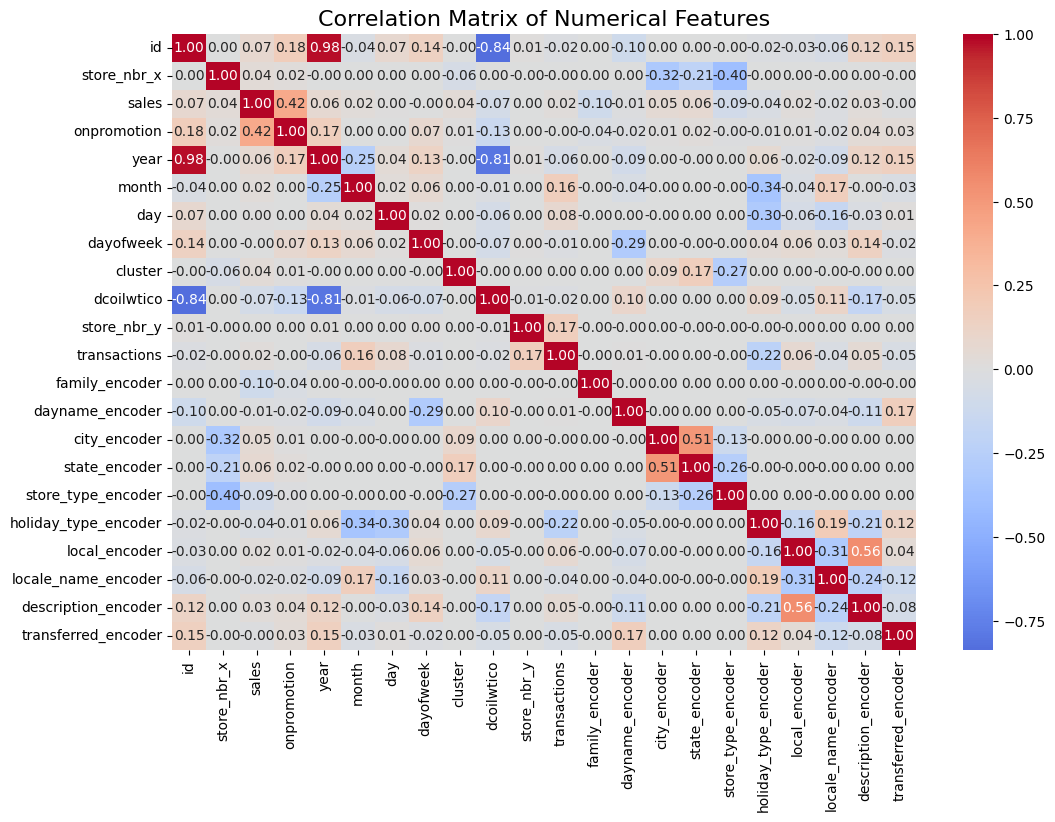

In [31]:
numeric_df =train_df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (11340113, 20) (11340113,)
Test set: (4860049, 20) (4860049,)


In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


input=[('polynomial',PolynomialFeatures(degree=2)),('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(input)

In [52]:
x_train_sample = x_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.sample(frac=0.1, random_state=42)
x_test = x_test.sample(frac=0.1, random_state=42)
y_test = y_test.sample(frac=0.1, random_state=42)
pipe.fit(x_train_sample,y_train_sample)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('scale', StandardScaler()), ('model', LinearRegression())])

In [53]:
yhat=pipe.predict(x_test)
yhat

array([2.00000000e+00, 8.99000000e+02, 3.02367000e+02, ...,
       2.09000000e+02, 3.99200000e+03, 3.97903932e-12])

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 6.227799700356148e-11
MSE: 1.731239415096285e-20
R²: 1.0


In [56]:
y_pred_train = pipe.predict(x_train_sample)
y_pred_test = pipe.predict(x_test)

r2_train = r2_score(y_train_sample, y_pred_train)
print(f"Training R²: {r2_train}")

r2_test = r2_score(y_test, y_pred_test)
print(f"Test R²: {r2_test}")

Training R²: 1.0
Test R²: 1.0


In [ ]:

ax1 = sns.kdeplot(y, color="r", label="Actual Value")
sns.kdeplot(yhat, color="b", label="Fitted Values" , ax=ax1)


plt.show()
plt.close()